In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline 

import pandas as pd
import numpy as np

from matplotlib.ticker import FuncFormatter, EngFormatter, StrMethodFormatter, MultipleLocator, PercentFormatter
import matplotlib as mpl

In [144]:
# mpl.get_cachedir()

In [3]:
# to rebuild the font cache after installing a font - run this and restart kernel
# https://stackoverflow.com/a/70647041
mpl.font_manager._load_fontmanager(try_read_cache=False)

In [2]:
df = pd.read_csv('kaggle_survey_2022_responses.csv')

q15 = df[[x for x in df.columns if x.startswith('Q15')]].iloc[1:]

colnames_content = {}
for col in q15.columns: 
    colnames_content[col] = q15[col].dropna().unique()[0].strip()

positive_entries = (~q15.isnull()).sum()\
    .reset_index()\
    .rename(columns={'index':'col', 0:'answer_cnt'})\
    .assign(
        library = lambda x: x['col'].apply(lambda v: colnames_content[v]), 
        perc = lambda x: x['answer_cnt']/(q15.shape[0]))

<ipython-input-2-cb9f1b5f06e7>:1: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kaggle_survey_2022_responses.csv')


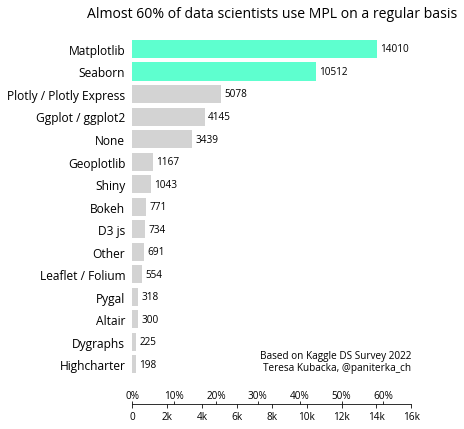

In [143]:
fontname = 'Open Sans'
smallfontsize = 10
bigfontsize = 12

colors = {'highlight':'#5EFFCF', 'default': 'lightgray'}
highlight_names = ['Seaborn','Matplotlib']

with mpl.rc_context({'font.family': fontname, 
                     'font.size': smallfontsize, 
                    'axes.labelcolor': 'red'}):

    f, ax = plt.subplots(figsize=(5,7))
    data = positive_entries.set_index('library').sort_values(by='answer_cnt')
    bars = ax.barh(y=data.index, width=data['answer_cnt'], 
           color=[colors['highlight'] if x in highlight_names else colors['default'] for x in data.index ])

    ax.tick_params(labelbottom=True, labeltop=False, bottom=True, top=False, 
                  )
    ax.tick_params(axis='y', labelsize=bigfontsize)
    ax.tick_params(left=False)

    n = q15.shape[0]/100
    secondary_xax = ax.secondary_xaxis('bottom', functions=(lambda x: x/n, lambda x: x*n))
    secondary_xax.tick_params(direction='in', pad=-14, labelsize=smallfontsize)
    secondary_xax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}%')) 

    ax.set_ylabel('')
    ax.xaxis.set_major_formatter(EngFormatter(sep='')) 

    bartext_fontdict = {'color': 'black',}
    offset = 200
    textlen_threshold = 10000
    for ypos, bar in enumerate(ax.patches):
        x = bar.get_width()
        annotation_text = '{:.0f}'.format(x)
        ax.text(x+offset, ypos, annotation_text,
            ha='left', va='center',
            fontdict=bartext_fontdict)

    ax.set_ylim(-1.75, ax.get_ylim()[1])    
    ax.set_xlim(0, 16e3)

    ax.spines[['bottom', 'left', 'right', 'top']].set_visible(False)

    footnote = [
        'Based on Kaggle DS Survey 2022',
        'Teresa Kubacka, @paniterka_ch',
    ]

    ax.annotate('\n'.join(footnote), 
                xy = (ax.get_xlim()[1],
                      bars.patches[0].get_bbox().ymin), xycoords=ax.transData, 
                      ha='right', va='bottom',
                bbox=dict(boxstyle='square,pad=0.0',fc='none', ec='none'), 
                family=fontname, 
            )
#     ax.axhline(bars.patches[0].get_bbox().ymin)
    ax.set_title('Almost 60% of data scientists use MPL on a regular basis', y=1, size=14)
    
f.savefig('mpl_prevalence.png', facecolor='white', dpi=300, bbox_inches='tight')

In [7]:
(~q15[['Q15_1', 'Q15_2']].isnull()).sum(axis=1).astype(bool)\
    .sum()

14641